In [1]:
import numpy as np
import matplotlib.pyplot as plt

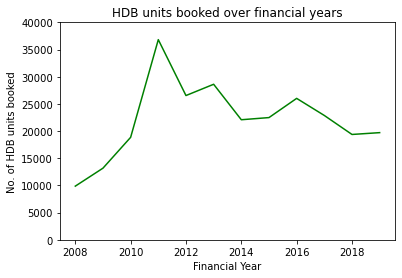

In [120]:
# Following is to reflect the number of HDB units sold from 2008 to 2019
new_flats = np.genfromtxt('bookings-for-new-flats.csv', delimiter=',', names=True)

plt.plot(new_flats['financial_year'], new_flats['no_of_units'], color='green')
plt.xlabel('Financial Year')
plt.ylabel('No. of HDB units booked')
plt.title('HDB units booked over financial years')
axes = plt.gca()
axes.set_ylim([0,40000])
plt.show()

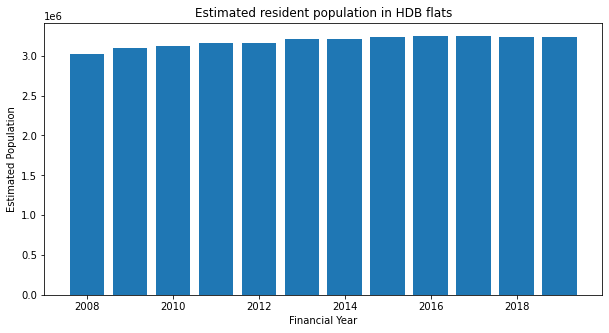

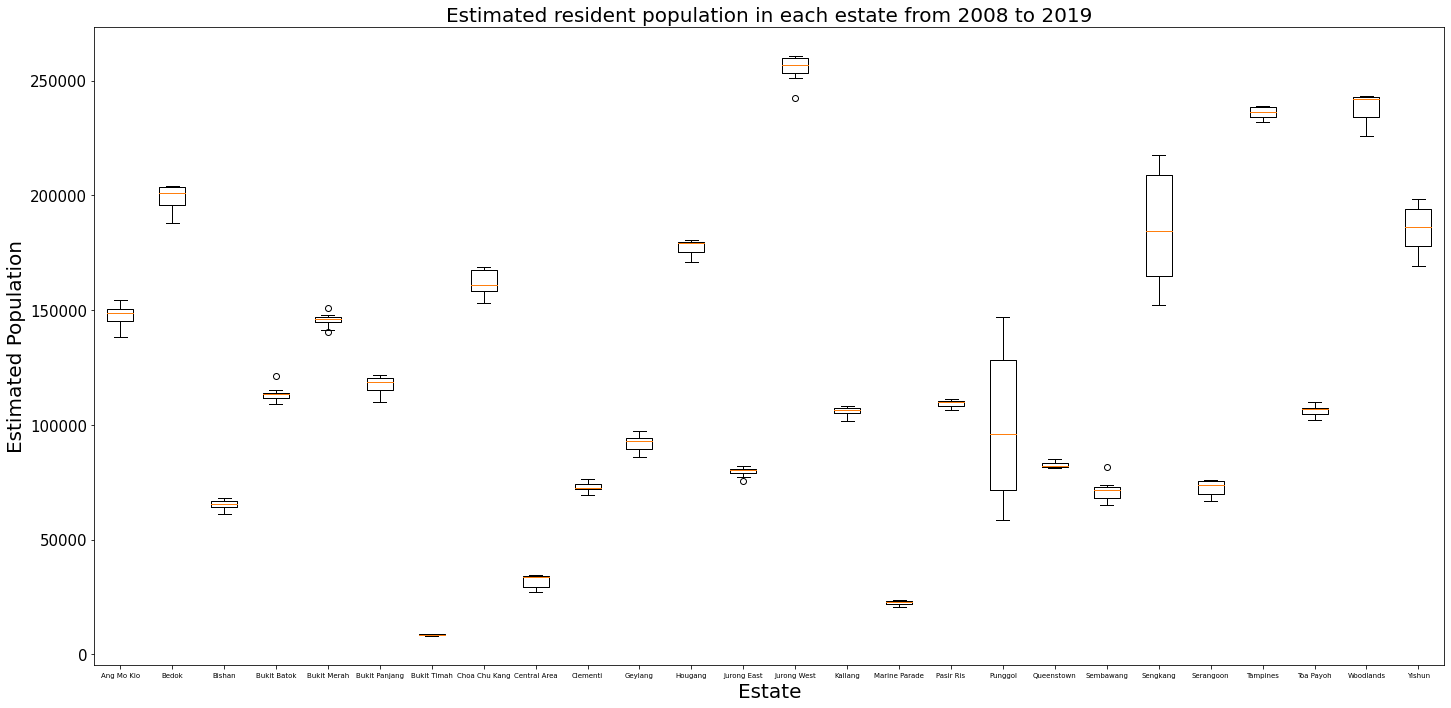

In [70]:
# Following is to reflect the estimated population living in HDB flats by town
sg = np.genfromtxt('estimated-resident-population-in-hdb-flats-by-town.csv', names=True, delimiter=',', 
                   dtype=('int', 'U50', 'int'))

# Unfilter incomplete data (total data) from dataset
sg = sg[sg['town_or_estate']!='Total']

# Compute total population per year
years = np.unique(sg['financial_year'])
populations = []
for i in years:
    populations.append(sum(sg[sg['financial_year']==i]['population']))

# Overview 
plt.figure(figsize=(10,5))
plt.bar(years, populations)
plt.xlabel('Financial Year')
plt.ylabel('Estimated Population')
plt.title('Estimated resident population in HDB flats')
plt.show()

# Breakdown for each estate's population
plt.figure(figsize=(20,10))
sg_amk = sg[sg['town_or_estate']=='Ang Mo Kio']['population']
sg_bedok = sg[sg['town_or_estate']=='Bedok']['population']
sg_bishan = sg[sg['town_or_estate']=='Bishan']['population']
sg_bb = sg[sg['town_or_estate']=='Bukit Batok']['population']
sg_bm = sg[sg['town_or_estate']=='Bukit Merah']['population']
sg_bp = sg[sg['town_or_estate']=='Bukit Panjang']['population']
sg_bt = sg[sg['town_or_estate']=='Bukit Timah']['population']
sg_cck = sg[sg['town_or_estate']=='Choa Chu Kang']['population']
sg_ca = sg[sg['town_or_estate']=='Central Area']['population']
sg_c = sg[sg['town_or_estate']=='Clementi']['population']
sg_g = sg[sg['town_or_estate']=='Geylang']['population']
sg_h = sg[sg['town_or_estate']=='Hougang']['population']
sg_je = sg[sg['town_or_estate']=='Jurong East']['population']
sg_jw = sg[sg['town_or_estate']=='Jurong West']['population']
sg_kw = sg[sg['town_or_estate']=='Kallang/Whampoa']['population']
sg_mp = sg[sg['town_or_estate']=='Marine Parade']['population']
sg_pr = sg[sg['town_or_estate']=='Pasir Ris']['population']
sg_p = sg[sg['town_or_estate']=='Punggol']['population']
sg_q = sg[sg['town_or_estate']=='Queenstown']['population']
sg_sb = sg[sg['town_or_estate']=='Sembawang']['population']
sg_sk = sg[sg['town_or_estate']=='Sengkang']['population']
sg_sr = sg[sg['town_or_estate']=='Serangoon']['population']
sg_t = sg[sg['town_or_estate']=='Tampines']['population']
sg_tp = sg[sg['town_or_estate']=='Toa Payoh']['population']
sg_w = sg[sg['town_or_estate']=='Woodlands']['population']
sg_y = sg[sg['town_or_estate']=='Yishun']['population']

y_values = [sg_amk, sg_bedok, sg_bishan, sg_bb, sg_bm, sg_bp, sg_bt, sg_cck, sg_ca, sg_c, sg_g, sg_h, sg_je, sg_jw, 
            sg_kw, sg_mp, sg_pr, sg_p, sg_q, sg_sb, sg_sk, sg_sr, sg_t, sg_tp, sg_w, sg_y]
x_labels = ['Ang Mo Kio', 'Bedok', 'Bishan', 'Bukit Batok', 'Bukit Merah', 'Bukit Panjang', 'Bukit Timah', 
            'Choa Chu Kang', 'Central Area', 'Clementi', 'Geylang', 'Hougang', 'Jurong East', 'Jurong West', 
           'Kallang', 'Marine Parade', 'Pasir Ris', 'Punggol','Queenstown', 'Sembawang','Sengkang', 
            'Serangoon', 'Tampines', 'Toa Payoh', 'Woodlands', 'Yishun']

plt.boxplot(y_values, labels=x_labels)
plt.xlabel('Estate',fontsize=20)
plt.ylabel('Estimated Population', fontsize=20)
plt.title('Estimated resident population in each estate from 2008 to 2019', fontsize=20)
plt.tight_layout()
plt.xticks(fontsize=7)
plt.yticks(fontsize=15)
plt.show()

Text(0.5, 1.0, 'Land Reclaimed')

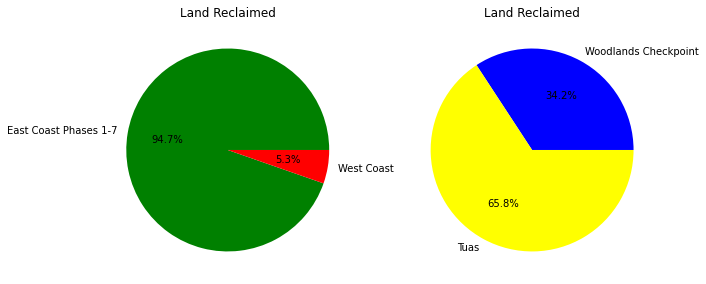

In [67]:
# Following is to reflect the amount of land reclaimed

sg = np.genfromtxt('cumulative-area-reclaimed-for-engineering-projects.csv', names=True, delimiter=',', 
                   dtype=('int', 'U50', 'float'))

sg_east = sg[sg['engineering_project']=='East Coast Phases 1-7']  # filter out east coast
sg_west = sg[sg['engineering_project']=='West Coast']  # filter out west coast
sg_cw = sg[sg['engineering_project']=='Woodlands Checkpoint'] # filter out Woodlands Checkpoint
sg_tuas = sg[sg['engineering_project']=='Tuas'] # filter out Tuas

plt.figure(figsize=(10, 5))

labels = [sg_east['engineering_project'][0], sg_west['engineering_project'][0]]
values = [sg_east['area_reclaimed'][0], sg_west['area_reclaimed'][0]]
plt.subplot(121)
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Land Reclaimed')

labels = [sg_cw['engineering_project'][0], sg_tuas['engineering_project'][0]]
values = [sg_cw['area_reclaimed'][0], sg_tuas['area_reclaimed'][0]]
plt.subplot(122)
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['blue', 'yellow'])
plt.title('Land Reclaimed')


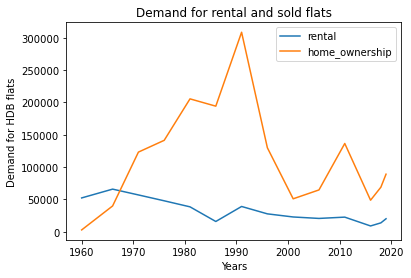

In [24]:
# Following is to reflect the demand for rental and sold flats

sg_flats = np.genfromtxt('demand-for-rental-and-sold-flats.csv', names=True, delimiter=',', 
                   dtype=('int', 'int', 'U50', 'int'))

sg_rental = sg_flats[sg_flats['flat_type']=='rental_flats']['demand_for_flats'] # filter out demand of rental flats 
sg_rental_year = sg_flats[sg_flats['flat_type']=='rental_flats']['start_year'] # filter out rental flats by year
sg_owner = sg_flats[sg_flats['flat_type']=='home_ownership_flats']['demand_for_flats'] # filter out sold flats
sg_owner_year = sg_flats[sg_flats['flat_type']=='rental_flats']['start_year'] # filter out sold flats by year

plt.plot(sg_rental_year, sg_rental, label='rental')
plt.plot(sg_owner_year, sg_owner, label='home_ownership')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Demand for HDB flats')
plt.title('Demand for rental and sold flats')
plt.show()
